#  Gesture Recognition using Convolutional Neural Networks

Train a convolutional neural network to make classifications on different hand gestures.  

1. Load and split data for training, validation and testing
2. Train a Convolutional Neural Network
3. Apply transfer learning to improve your model



## Colab Link

Include a link to your colab file here

Colab Link:
https://drive.google.com/file/d/1DFGQjaJlHEtuA0E5GWln9GV5ok_0G-YK/view?usp=sharing

## Dataset

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing. The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
)

----------------------------
**Description of how the data was split: Current Method (code in the first half of Part 1)**
Steps used:
 Import necessary libariers
 Give access to get the overall zip file.
 Load the full dataset using ImageLoader (this would be passed into the train functions where the train function performs DataLoader given a specific batch_size so it works for all batch sizes).

 Create sub_folders for each Train/Val/Test folder eg. In Train folder (for each of the labels A to I) create folders if there isn't the same one present already.

 For every single file in the original Dataset/ A to I folders:
 Split the data
For each of the Folders Classes from A to I
take all the files from the full/ original data path that was unzipped
then loop though all the files' index
 (Example: such that copy 60% of the current files (using indexes) in the folder to the
 Train/A, put the next 20% (since the first if will the false then) in Val/A, and the last remaining (20%) in Train/A folder
 Copy using shutil.copy

 Extract splitted data using ImageFolder for Train/, Val/, Test/ folders each with separate ImageFolder
 The number of train/val/test images are shown in the code below

 Both methods (method 1 and older method explained below), ensure that images are not repeated in the Test Data such that new images (but from all labels A-I, new images from each label are checked in the test data - provided the dataset doesn't repeat images).


**Description of how the data was split: Older method**
The data was first unzipped from the google drive folder and placed into a lab3 dataset folder where the fulldataset had been loaded from ImageFolder.
The first step to have a 60/20/20 percent for train,validation,test data split was to count the total number of images present in each folder sub_class.
numImages array stored the number of images available in the labelled sub_folder class.
The get_data_load function appends a number in the train_index from 0 to 60% of the data in each Class, val_index from the current 60% class data to 80% of the class data, and test_index from 80-100% of the data; this happens for each class; for instance, class A has 60% of the data sent to train, 20% to validation and 20% to test and same for the rest of the classes.The number of images in each class are passed into the get_data_load function, SubsetRandomSampler and data indicies are sent as a sampler into the dataLoader to get the train_loader, val_loader, and test_loader that become the train_data, val_data, and test_data.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import zipfile
import matplotlib.pyplot as plt


In [ ]:
# Give access to the google drive, to get the Zip File
from google.colab import drive
drive.mount('/content/drive')

'''
#Did this only once

 Unzip file in lab3_data_folder
with zipfile.ZipFile('/content/drive/My Drive/Lab3_Dataset.zip', 'r') as reference:
  reference.extractall('/content/drive/My Drive/lab3_data_folder')
'''

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


"\n#Did this only once\n\n Unzip file in lab3_data_folder\nwith zipfile.ZipFile('/content/drive/My Drive/Lab3_Dataset.zip', 'r') as reference:\n  reference.extractall('/content/drive/My Drive/lab3_data_folder')\n"

In [ ]:
#Load the full dataset from the lab3_data_folder (no transformations currently)
fulldataset = torchvision.datasets.ImageFolder(root = '/content/drive/My Drive/lab3_data_folder/Lab3_Gestures_Summer')


In [ ]:
import os
import shutil
############ Run Only Once
original_data_path = '/content/drive/My Drive/lab3_data_folder/Lab3_Gestures_Summer/'
train_dataset_path = '/content/drive/My Drive/lab3_data_folder/TrainDataSet/'
val_dataset_path = '/content/drive/My Drive/lab3_data_folder/ValDataSet/'
test_dataset_path = '/content/drive/My Drive/lab3_data_folder/TestDataSet/'

subFolder = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
#Sub folders for trian, val, test if there weren't already there
for label in subFolder:
    train_label_path = os.path.join(train_dataset_path, label)
    val_label_path = os.path.join(val_dataset_path, label)
    test_label_path = os.path.join(test_dataset_path, label)

    if not os.path.exists(train_label_path):
        os.mkdir(train_label_path)
    if not os.path.exists(val_label_path):
        os.mkdir(val_label_path)
    if not os.path.exists(test_label_path):
        os.mkdir(test_label_path)
    os.makedirs(test_label_path, exist_ok=True)


In [ ]:
#############Run Only Once ###########
#Split the data
# For each of the Folders Classes from A to I
# take all the files from the full/ original data path that was unzipped
#then loop though all the files' index
 #(Example: such that copy 60% of the current files (using indexes) in the folder to the
 # Train/A, put the next 20% (since the first if will the false then) in Val/A, and the last remaining (20%) in Train/A folder
 #Copy using shutil.copy
for part in subFolder:
    files = os.listdir(os.path.join(original_data_path, part))
    for index, img in enumerate(files):
        source_path = os.path.join(original_data_path, part, img)
        if index < 0.6 * len(files):
            dest_path = os.path.join(train_dataset_path, part)
            shutil.copy(source_path,dest_path)
            #print(dest_path)
        elif index < 0.8 * len(files):
            dest_path = os.path.join(val_dataset_path, part)
            shutil.copy(source_path,dest_path)
        else:
            dest_path = os.path.join(test_dataset_path, part)
            shutil.copy(source_path,dest_path)

In [ ]:
original_data_path = '/content/drive/My Drive/lab3_data_folder/Lab3_Gestures_Summer/'
train_dataset_path = '/content/drive/My Drive/lab3_data_folder/TrainDataSet/'
val_dataset_path = '/content/drive/My Drive/lab3_data_folder/ValDataSet/'
test_dataset_path = '/content/drive/My Drive/lab3_data_folder/TestDataSet/'

subFolder = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
#Normalize data
transform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Use ImageFolder to extract splitted (60-20-20 % ) data from the folder
train_img_folder_load = torchvision.datasets.ImageFolder(train_dataset_path, transform=transform)
val_img_folder_load = torchvision.datasets.ImageFolder(val_dataset_path, transform=transform)
test_img_folder_load = torchvision.datasets.ImageFolder(test_dataset_path, transform=transform)
#Calculate data length / how many images there are
num_train_data = len(train_img_folder_load)
num_val_data = len(val_img_folder_load)
num_test_data = len(test_img_folder_load)
print("Train Data: "+ str(num_train_data) + " Val Data: "+ str(num_val_data) +" Test Data :" + str(num_test_data) )
total_data_stored = num_train_data +num_val_data + num_test_data
percentage_train =  (num_train_data/total_data_stored)*100
percentage_val =  (num_val_data/total_data_stored)*100
percentage_test =  (num_test_data/total_data_stored)*100
print("Train Percentage: "+ str(percentage_train) +' %' + " Val Percentage: "+ str(percentage_val) +' %'+" Test Percentage :" + str(percentage_test)+' %' )


Train Data: 1336 Val Data: 443 Test Data :440
Train Percentage: 60.207300585849474 % Val Percentage: 19.96394772420009 % Test Percentage :19.828751689950426 %


Note: The method #2 below was the older way to split images into test/val/training data and one drawback of this older way was that if get_data_load would be called again, the train/test/val would change each time ( and the DataLoader needed to be called again so that the batch_size could be selected). The way below still achieves the task for splitting the data into 60%, 20%, 20% data split.


Method # 2 (old method- currently not used here)

In [ ]:
'''
Count the number of Images in Each Folder
'''

import os
# this dataset folder contains sub-folders for each A, B, C...
dataset_folder = r'/content/drive/My Drive/lab3_data_folder/Lab3_Gestures_Summer'
#Sub_folders inside dataset_folder
subFolder = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']
sub_folders = []

for i in range(len(subFolder)):
  sub_folders.append(os.path.join(dataset_folder, subFolder[i]))

numImages = [] # each class from 0 to 9 will contain corresponding images in each folder

for i in range(len(sub_folders)):
  #print(sub_folders[i])
  count = 0
  for element in os.listdir(sub_folders[i]):
    #element is each image at a time in each folder
      specificElementPath = os.path.join(sub_folders[i], element)

      if os.path.isfile(specificElementPath):
          count+= 1

  numImages.append(count)


print( "Files in each class index", numImages)

'''
Split for train (60%)/Validation (20%) /Test set (20%) so 80% of the data for train + validation, and 20% for testing
 To ensure that different selections are obtained from each: such as 60% 20% 20% from each Letter A, B, and C
'''
def get_data_load(train_validation_test_folder, batch_size=27, num_images_list=1):
      train_index = []
      val_index = []
      test_index = []
      max_index_for_train = 0
      selectValue = 0
      for numImagesIndex in num_images_list:

          for limitedIndex in range(selectValue, selectValue + int(numImagesIndex * 0.6)):
            train_index.append(limitedIndex)
          for limitedIndex in range(selectValue + int(numImagesIndex * 0.6), selectValue + int(numImagesIndex* 0.80)):
            val_index.append(limitedIndex)
          for limitedIndex in range(selectValue + int(numImagesIndex * 0.80), selectValue + numImagesIndex):
            test_index.append(limitedIndex)

          selectValue += numImagesIndex

     # the transformed data is the one being passed in as train_validation_test_folder dataset
      #Similar process from lab 2
      np.random.seed(1000) # Fixed numpy random seed for reproducible shuffling
      np.random.shuffle(train_index)
      np.random.shuffle(val_index)
      np.random.shuffle(test_index)

      train_sampler = SubsetRandomSampler(train_index)

      train_loader = torch.utils.data.DataLoader(train_validation_test_folder, batch_size=batch_size,
                                                num_workers=1, sampler=train_sampler)

      val_sampler = SubsetRandomSampler(val_index)

      val_loader = torch.utils.data.DataLoader(train_validation_test_folder, batch_size=batch_size,
                                                num_workers=1, sampler=val_sampler)

      test_sampler = SubsetRandomSampler(test_index)

      test_loader = torch.utils.data.DataLoader(train_validation_test_folder, batch_size=batch_size,
                                                num_workers=1, sampler=val_sampler)

      return train_loader, val_loader, test_loader



Files in each class index [254, 247, 245, 247, 247, 236, 250, 244, 249]


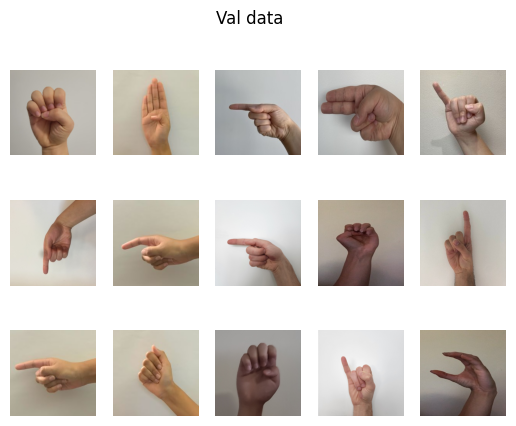

In [ ]:

#Pass into
#first normalize the image
transform = transforms.Compose(
          [transforms.ToTensor(),
          transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# pass in the loaded dataset
dataset = torchvision.datasets.ImageFolder(dataset_folder, transform=transform)

train_data, val_data, test_data = get_data_load(train_validation_test_folder=dataset,batch_size = 27,num_images_list=numImages) # data_loaders

def plot_data(title_of_graph, loader_type):
  # Credits: this function is from lab2
    k = 0
    for images, labels in loader_type:
        # since batch_size = 1, there is only 1 image in `images`
        image = images[0]
        # place the colour channel at the end, instead of at the beginning
        img = np.transpose(image, [1, 2, 0])
        # normalize pixel intensity values to [0, 1]
        img = img / 2 + 0.5
        plt.subplot(3, 5, k + 1)
        plt.suptitle(title_of_graph)
        plt.axis('off')
        plt.imshow(img)

        k += 1
        if k > 14:
            break

plot_data("Train data", train_data)
plot_data("Val data", val_data)


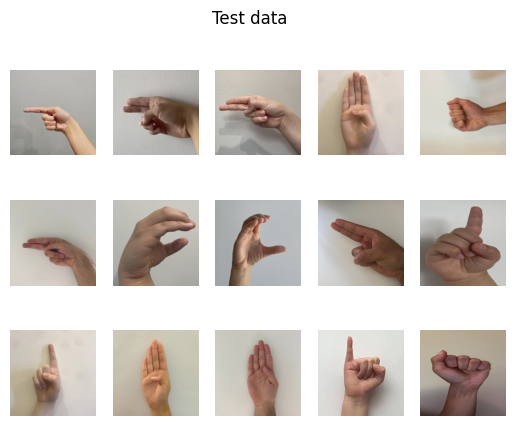

In [ ]:
plot_data("Test data", test_data)

In [ ]:
print("Train data images", len(train_data))
print("Validation data images", len(val_data))
print("Test data images", len(test_data))
# This is loaded into batches - which is why the numbers appear lower as they are batch numbers

Train data images 50
Validation data images 17
Test data images 17


### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

----------------
**Choice of Network Architecture**
The Neural Network chosen is a CNN ( as it is better able to generalize spatial information unlike an ANN). I have used 2 convolution layers each with Max Pooling, and 2 fully connected layers.

The pooling layers are placed right of the corresponding convolution layers, the ReLU activation function has been used (since it is 0 during negative values) to help with non-linearity in the current space.
The in_channels of conv1 is 3 because it is a RGB image, the out_channels is chosen as 5 kernals (depth). These kernals are few at first because there are less low level features like edges/lines than high level objects.The output_channel of conv1 is and must be the input_channel of conv2.
As the neural network goes deeper, the out_channels or number of kernals increases to 10 (in conv2).
The fully connected layers helps with further classification and images must be flattened as a vector before sending them into fully connected layers. Kernal size of 5 is chosen since it is not too large and not too small (so that the model is able to generalize quickly but at the same time not focus too much on extreme fine grain details).
The hidden layer of 32 was chosen since it has larger than 9 classes but not too large/ appropriate numebr of additional features have been used by the network (balance between accuracy and model speed).

There are total of 9 classes from A - I, so the output layer is 9.

In [ ]:
#Layers: Conv + max Pool = layer 1, layer 2 = conv + maxPool , layer 3 =
# This 10 * 53 * 53, 10 is the depth coming out of conv2
#53 by 53 is calculated from Output of conv2: by calcualting using the steps
#Output of conv1 = input of pool, output of pool = input of conv2, and output of conv2
torch.manual_seed(1)

class GestureModel(nn.Module):
    def __init__(self):
        super(GestureModel, self).__init__()
        self.name = "gesture"
        self.conv1 = nn.Conv2d(3, 5, 5)#padding 0, stride 1
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)    #flatten to pass to fully connected layers 1 and 2
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

---------------------------
**Choice of Loss and Optimizer**


The Loss function that is used is CrossEntropyLoss as the activation function is not applied to the last layer and the Cross Entropy Loss does that calculation/more numerically stable. The cross entropy loss allows for mult-class classification.

The adam optimizer has been used for training the model because this optimizes the loss using a combination of techniques from RMS prop and  SGD with momentum. This would help in finding and updating the weights so that the overall accuracy is improved.

In [ ]:
def get_accuracy(model, batch_size=27, type_of_accuracy="Train"):

   if type_of_accuracy == "Train":
        data = train_img_folder_load
   elif type_of_accuracy == "Val":
        data = val_img_folder_load
   elif type_of_accuracy == "Test":
        data = test_img_folder_load
   elif type_of_accuracy == "Small":
        data = small_dataset
   use_cuda = True
   correct = 0
   total = 0
   for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
    #Use GPU for faster results
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #compute model's output
    output = model(imgs)
    #pick the largest prediction, is the alphabet class that model predicts
    pred = output.max(1, keepdim=True)[1]
    # if the model prediction == true labels, get the sum of it
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
   return correct / total

def get_accuracy_train_val(model, batch_size=27, train=True):
   '''
    Inputs: model
    data =  training or validation or testing data
    Output: accuracy of the model
    Default batch size is 64 unless specified
   '''
   if train:
        data = train_img_folder_load
   else:
        data = val_img_folder_load
   correct = 0
   total = 0
                    #  train_data was obtained from data_loader itself
   for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
    #Use GPU for faster results
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #compute model's output
    output = model(imgs)
    #pick the largest prediction, is the alphabet class that model predicts
    pred = output.max(1, keepdim=True)[1]
    # if the model prediction == true labels, get the sum of it
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
   return correct / total

def get_model_name(name, batch_size, learning_rate, epoch):
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

def train(model, data, learning_rate =0.01, batch_size=27, num_epochs=1):
    torch.manual_seed(1000) # to ensure consistency in calculations

    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss() #Cross Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr = learning_rate) # Use Adam Optimizer
    iters, losses, train_acc,train_err, train_loss, val_acc, val_acc_best = [], [], [], [], [], [], []
    start_time = time.time()

    use_cuda = True

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        val_acc_curr_best = 0

        print("Epoch: ", epoch + 1)
        for imgs, labels in iter(train_loader):
            #Use GPU for faster results
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            out = model(imgs)            # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            n += 1
            losses.append(float(loss)/batch_size)             # compute *average* loss

        train_acc.append(get_accuracy(model, batch_size, "Train")) # compute training accuracy
        curr_val_acc =get_accuracy(model, batch_size, "Val")
        val_acc.append(curr_val_acc)  # compute validation accuracy
        if (val_acc[-1] > val_acc_curr_best):
              val_acc_curr_best = val_acc[-1]
              val_acc_best.append(val_acc_curr_best)
        total_train_loss += loss.item()
        total_epoch += len(labels)

        print((
               "So Far Best Validation Accuracy: {} Train Accuracy: {}, Validation Accuracy: {} ").format(
                   train_acc[-1],
                   val_acc[-1], val_acc_best[-1]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    # plotting
    print("Finished Training")
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
    # Find the epoch with the best val_acc_best[]
    final_best_val_acc = max(val_acc_best)
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Best Validation Accuracy: {}".format(final_best_val_acc))



def train_E(model, data, learning_rate=0.01, batch_size = 27, num_epochs=1): # Tutorial
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr = learning_rate) # Use Adam Optimizer

    iters, losses, train_acc, val_acc = [], [], [], []
    start_time = time.time()

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch ", epoch)
        for imgs, labels in iter(train_loader):

            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_train_val(model, batch_size, train = True)) # compute training accuracy
            val_acc.append(get_accuracy_train_val(model,batch_size,train = False)) # compute validation accuracy
            n += 1
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


def get_accuracy_small_dataset(model, data, batch_size=32):
   #Small dataset
   correct = 0
   total = 0
   data = small_dataset
   for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
    #Use GPU for faster results
    if use_cuda and torch.cuda.is_available():
      imgs = imgs.cuda()
      labels = labels.cuda()
    #compute model's output
    output = model(imgs)
    #pick the largest prediction, is the alphabet class that model predicts
    pred = output.max(1, keepdim=True)[1]
    # if the model prediction == true labels, get the sum of it
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
   return correct / total




### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

In [ ]:
#Consutrct a Small Dataset from Different Letters
normalizeAndTransform = transforms.Compose(
        [transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

small_dataset = torchvision.datasets.ImageFolder(root = '/content/drive/My Drive/lab3_data_folder/small_dataset/dataset', transform =normalizeAndTransform)



In [ ]:
def train_small_dataset(model, data, learning_rate=0.01, batch_size = 27, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    iters, losses, train_acc, val_acc = [], [], [], []
    start_time = time.time()

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        print("Epoch ", epoch)
        for imgs, labels in iter(train_loader):
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()


            out = model(imgs)             # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy_small_dataset(model, data, batch_size = batch_size)) # compute training accuracy
            val_acc.append(get_accuracy_small_dataset(model,data, batch_size = batch_size))  # compute validation accuracy
            n += 1
    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    # plotting
    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))

use_cuda = True

model = GestureModel()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')



CUDA is not available.  Training on CPU ...


Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Finished Training
Total time elapsed: 1712.20 seconds


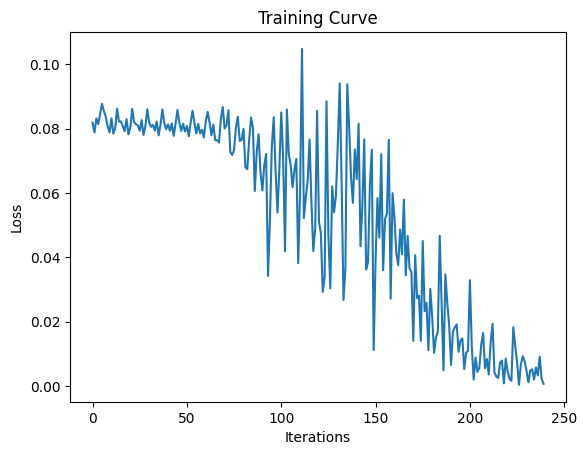

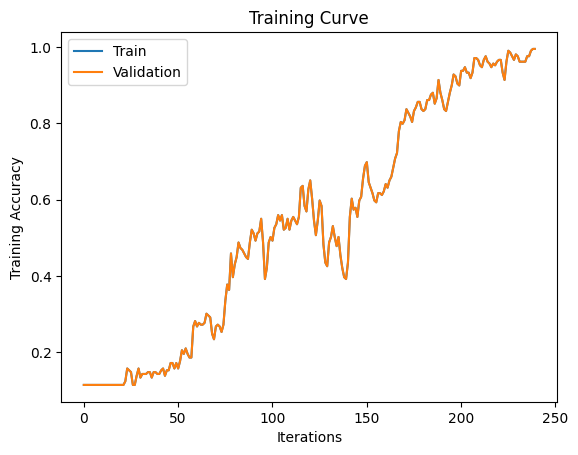

Final Training Accuracy: 0.9952153110047847
Final Validation Accuracy: 0.9952153110047847


In [ ]:
model = GestureModel()

train_small_dataset(model, data=small_dataset,learning_rate =0.01, batch_size=27, num_epochs=30)


### 3. Hyperparameter Search [15 pt]

### Part (a) - 3 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.




1. Number of Kernals (output channels):
The output image resolution is also impacted by kernal size: small kernals focus on more local features where as larger kernals focus on broader features. Since gesture recognition focuses on edge detection, the earlier stages may need smaller kernals as there are smaller amount of local features/details picked up by it. The image resolution is also impacted by the kernal size.

2. Batch Size:
Measuring the impact of different batch_sizes that are processed at once to update weights per batch instead of for each image, larger batch_size allows for more generalization.
3. Learning Rate:
A small learning rate allows for small steps to reach the optimal weight parameters that minimize loss (more training time). Too large of learning rate result in maybe missing the optimal weight parameters.
Thus, exploring various learning  rates are essential to the model's performance.

Additional ones:
Padding:
If the image is not centered properly, than the edge pixels do not have as much importance as the center ones during convolution. Thus, the amount of padding may impact the training accuracy and classification if the data is not centered properly.

### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Kernals and Number of Kernals (requires modifying the old Neural Network Model)

CUDA is not available.  Training on CPU ...
Epoch  0
Finished Training
Total time elapsed: 1429.03 seconds


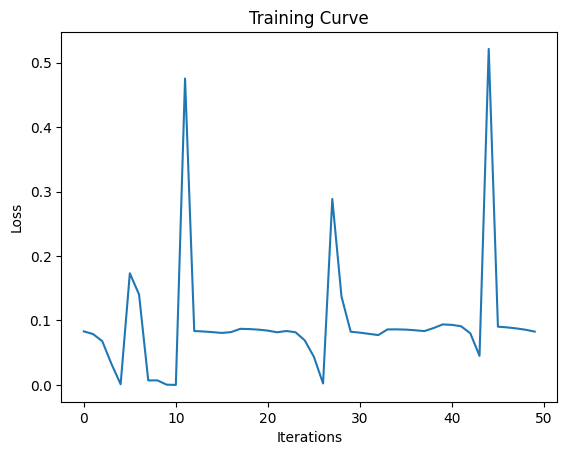

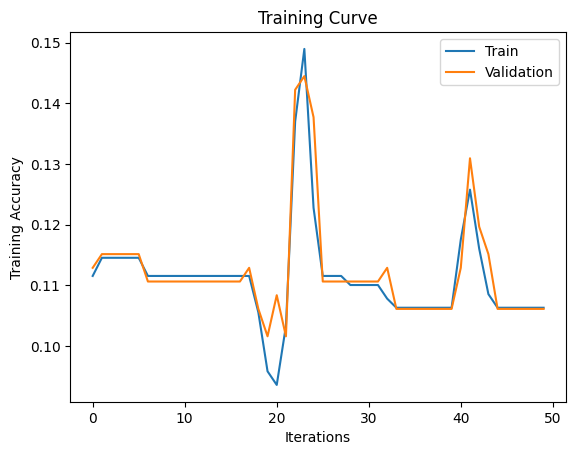

Final Training Accuracy: 0.1062874251497006
Final Validation Accuracy: 0.10609480812641084


In [ ]:
use_cuda = True
torch.manual_seed(1)
#Changing the Output Channels (Num_Kernals) from 5 to 7, and from 5 to 10 for the second layer
class GestureModelKernalV1(nn.Module):
    def __init__(self):
        super(GestureModelKernalV1, self).__init__()
        self.name = "GestureModelKernalV1"
        self.conv1 = nn.Conv2d(3, 7, 5)#padding 0, stride 1
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(7, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 32)
        self.fc2 = nn.Linear(32, 9)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)    #flatten to pass to fully connected layers 1 and 2
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = x.squeeze(1) # Flatten to [batch_size]
        return x

model = GestureModelKernalV1()
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')

#train(model, train_img_folder_load, learning_rate =0.1, batch_size=27, num_epochs=5)
train_E(model, train_img_folder_load, learning_rate=0.01, batch_size = 27, num_epochs=1)


Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Finished Training
Total time elapsed: 5564.15 seconds


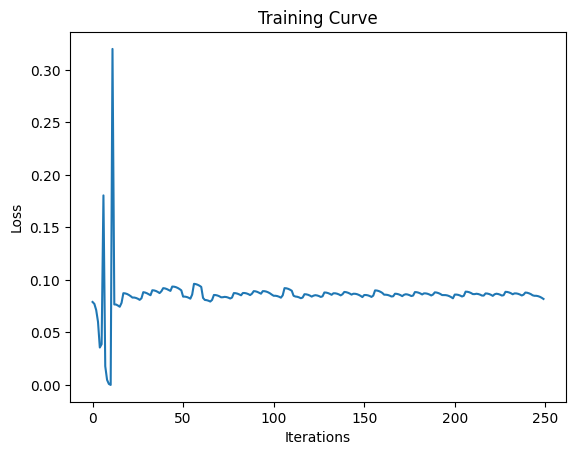

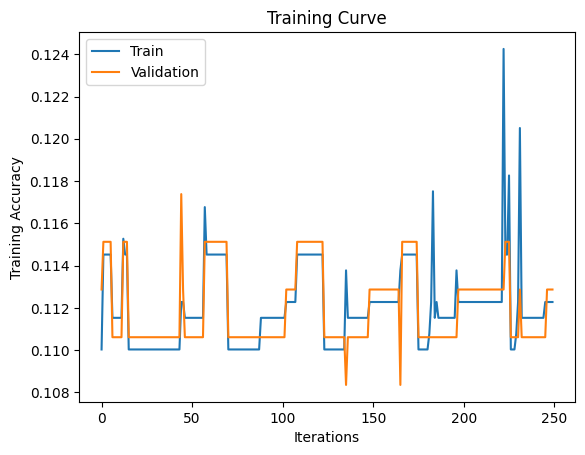

Final Training Accuracy: 0.1122754491017964
Final Validation Accuracy: 0.11286681715575621


In [ ]:
model_second = GestureModel()
train_E(model_second, train_img_folder_load, learning_rate=0.01, batch_size = 27, num_epochs=5)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Finished Training
Total time elapsed: 929.01 seconds


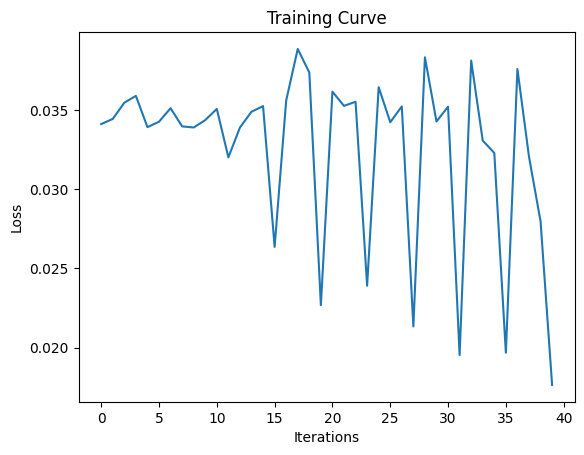

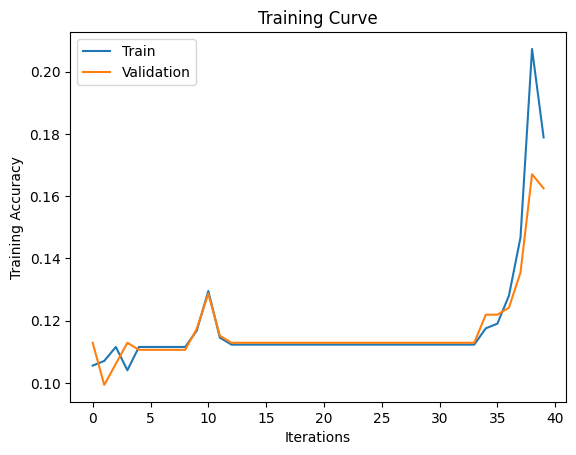

Final Training Accuracy: 0.17889221556886228
Final Validation Accuracy: 0.16252821670428894


In [ ]:
model_second = GestureModel()
#Actual data set was used to test out the model above
#However, as the limit of GPU was reached before part3, small_dataset also was used
train_E(model_second, small_dataset, learning_rate=0.01, batch_size = 64, num_epochs=10)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Finished Training
Total time elapsed: 697.23 seconds


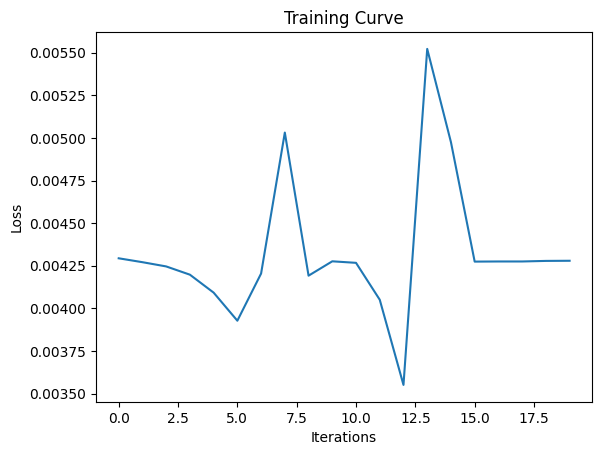

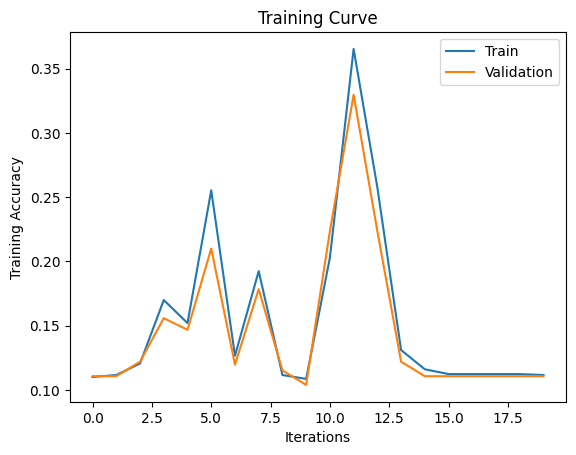

Final Training Accuracy: 0.11152694610778444
Final Validation Accuracy: 0.11060948081264109


In [ ]:
model_second = GestureModel()
# different learning rate, and batch_size increase
train_E(model_second, small_dataset, learning_rate=0.099, batch_size = 512, num_epochs=20)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Finished Training
Total time elapsed: 1051.58 seconds


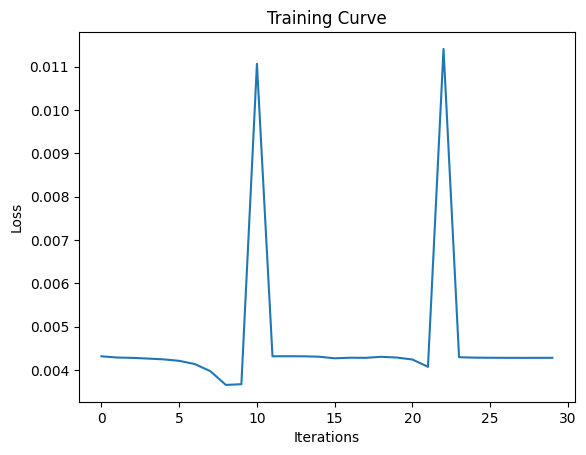

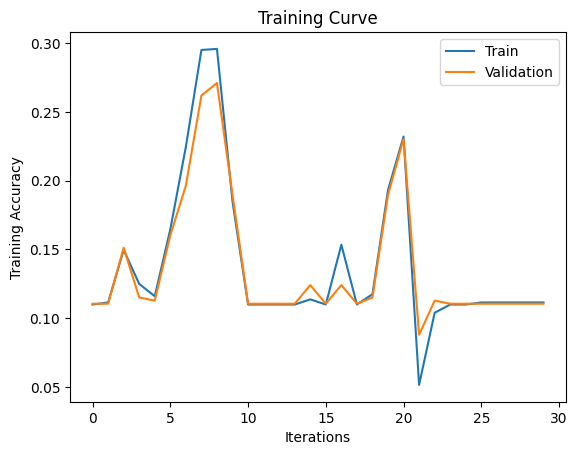

Final Training Accuracy: 0.11152694610778444
Final Validation Accuracy: 0.11060948081264109


In [ ]:
#Increase the number of epochs on small_dataset
model_second = GestureModel()
train_E(model_second, small_dataset, learning_rate=0.099, batch_size = 512, num_epochs=30)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
Epoch  50
Epoch  51
Epoch  52
Epoch  53
Epoch  54
Epoch  55
Epoch  56
Epoch  57
Epoch  58
Epoch  59
Epoch  60
Epoch  61
Epoch  62
Epoch  63
Epoch  64
Epoch  65
Epoch  66
Epoch  67
Epoch  68
Epoch  69
Epoch  70
Epoch  71
Epoch  72
Epoch  73
Epoch  74
Epoch  75
Epoch  76
Epoch  77
Epoch  78
Epoch  79
Epoch  80
Epoch  81
Epoch  82
Epoch  83
Epoch  84
Epoch  85
Epoch  86
Epoch  87
Epoch  88
Epoch  89
Epoch  90
Epoch  91
Epoch  92
Epoch  93
Epoch  94
Epoch  95
Epoch  96
Epoch  97
Epoch  98
Epoch  99
Epoch  100

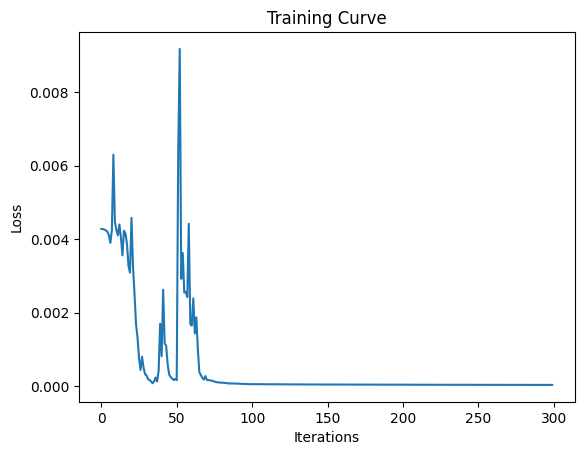

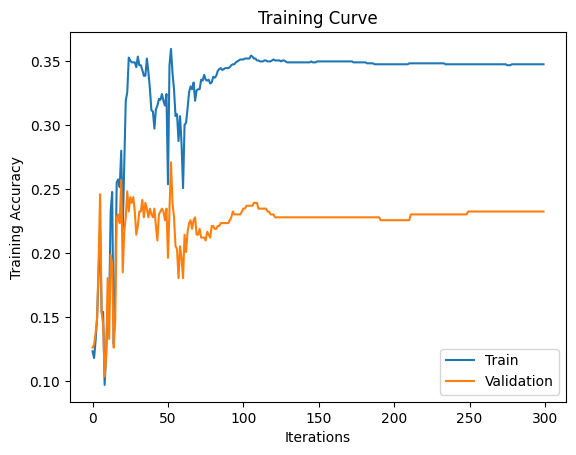

Final Training Accuracy: 0.3473053892215569
Final Validation Accuracy: 0.2325056433408578


In [ ]:
#Increase number of epochs further to reach a better view of the graph
model_second = GestureModel()
train_E(model_second, small_dataset, learning_rate=0.099, batch_size = 512, num_epochs=300)

Epoch  0
Epoch  1
Epoch  2
Epoch  3
Epoch  4
Epoch  5
Epoch  6
Epoch  7
Epoch  8
Epoch  9
Epoch  10
Epoch  11
Epoch  12
Epoch  13
Epoch  14
Epoch  15
Epoch  16
Epoch  17
Epoch  18
Epoch  19
Epoch  20
Epoch  21
Epoch  22
Epoch  23
Epoch  24
Epoch  25
Epoch  26
Epoch  27
Epoch  28
Epoch  29
Epoch  30
Epoch  31
Epoch  32
Epoch  33
Epoch  34
Epoch  35
Epoch  36
Epoch  37
Epoch  38
Epoch  39
Epoch  40
Epoch  41
Epoch  42
Epoch  43
Epoch  44
Epoch  45
Epoch  46
Epoch  47
Epoch  48
Epoch  49
Epoch  50
Epoch  51
Epoch  52
Epoch  53
Epoch  54
Epoch  55
Epoch  56
Epoch  57
Epoch  58
Epoch  59
Epoch  60
Epoch  61
Epoch  62
Epoch  63
Epoch  64
Epoch  65
Epoch  66
Epoch  67
Epoch  68
Epoch  69
Epoch  70
Epoch  71
Epoch  72
Epoch  73
Epoch  74
Epoch  75
Epoch  76
Epoch  77
Epoch  78
Epoch  79
Epoch  80
Epoch  81
Epoch  82
Epoch  83
Epoch  84
Epoch  85
Epoch  86
Epoch  87
Epoch  88
Epoch  89
Epoch  90
Epoch  91
Epoch  92
Epoch  93
Epoch  94
Epoch  95
Epoch  96
Epoch  97
Epoch  98
Epoch  99
Epoch  100

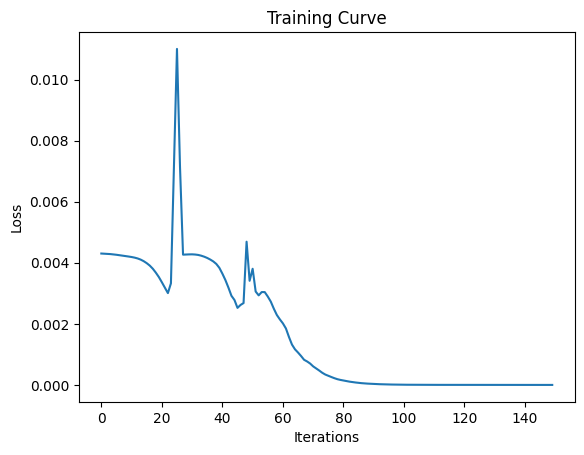

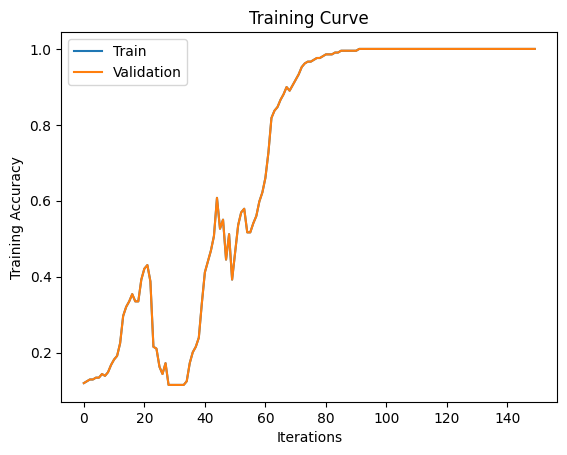

Final Training Accuracy: 1.0
Final Validation Accuracy: 1.0


In [ ]:
model_second = GestureModel()
#Change learning rate
train_small_dataset(model_second, data=small_dataset,learning_rate =0.01, batch_size=512, num_epochs=150)


### Part (c) - 3 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

Out of all the models that were trained above, the best model is the last one since it has the highest validation accuracy out of all of them and the graph appears to be less fluctuating and consistently increasing in the accuracy. The validation accuracy is about 100%.

Due to reaching the limit for GPU usage for google colab, I was not able to train the entire data set for more epochs; As a result, CPU training took about 23 minutes per epoch.

If enough epochs were used, then the validation accuracy would have reached to a reasonable number.

The number of epochs or iterations should be stopped before the model's validation accuracy starts to plateau and when the validation loss starts to increase (consistently) but the training loss still decreases. Before that optimal point (where the model's validation loss was at the lowest point and starts to increase), the model is underfitted and after that optimal point, the model is considered overfit. Thus, when tuning the hyperparameters on the validation set and choosing the model for the test set, these concepts are considered.

The model should be neither overfitted nor underfitted; if the model is underfitted such as only few epochs were used or a too small learning rate, a way to overcome that would be to train for multiple epochs or increase the learning rate slightly (so that the best possible model is chosen for testing that will give a higher testing accuracy).

### Part (d) - 4 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
test_accuracy = get_accuracy(model_second, 27, "Test")
print("test accuracy: ", test_accuracy)

test accuracy:  0.47954545454545455


The Reason why the test accuracy is about 50%, is because the small_dataset model was chosen (due to the train_time issue mentioned earlier) which was overfitted. This was even though the small_dataset was a medium sized dataset that contained lots of images as well. This shows that despite a 100% validation accuracy on a small dataset, having a higher number of epochs overfitted on the small dataset leading the model to memorize data in the end - reducing its overall performance on unseen data.

### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
# train_data, val_data, and test_data were already obtained after doing .DataLoader thus,
#features = alexnet.features(img)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
import numpy as np

In [ ]:
classes_result = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

train_folder_path = '/content/drive/My Drive/lab3_data_folder/AlexNet/Train'

val_folder_path ='/content/drive/My Drive/lab3_data_folder/AlexNet/Validation'
test_folder_path ='/content/drive/My Drive/lab3_data_folder/AlexNet/Test'

def save_computed_features(dataLoader, path):
  index = 0

  for images, label in iter(dataLoader):
    features = alexnet.features(images)
    features_tensor = torch.from_numpy(features.detach().numpy())
    full_path = path + '/' + str(classes_result[label]) + '/tensor_' + str(index)
    os.makedirs(full_path, exist_ok=True)
    if (path == '/content/drive/My Drive/lab3_data_folder/AlexNet/Train'):
        features_array_train = features_tensor.numpy()
        np.save('features_train.npy', features_array_train)
    elif(path == '/content/drive/My Drive/lab3_data_folder/AlexNet/Validation'):
        features_array_val = features_tensor.numpy()

        np.save('features_val.npy', features_array_val) # an extra step to save features as a Numpy Array in a file
    else:
        features_array_test= features_tensor.numpy()

        np.save('features_test.npy', features_array_test)

    torch.save(features_tensor.squeeze(0),full_path  + '.tensor')
      #print(path + '/' classes_result[label] + '/tensor' + str(index))
    index += 1

dataLoaderTrain = torch.utils.data.DataLoader(train_img_folder_load, batch_size=1, shuffle=True) # Per image
dataLoaderVal = torch.utils.data.DataLoader(val_img_folder_load, batch_size=1, shuffle=True)
dataLoaderTest = torch.utils.data.DataLoader(test_img_folder_load, batch_size=1, shuffle=True)

save_computed_features(dataLoaderTrain,train_folder_path)
#print("Saved Train Features")
save_computed_features(dataLoaderTest,test_folder_path)
#print("Saved Test Features")
save_computed_features(dataLoaderVal,val_folder_path)
#print("Saved Validation Features")


print("Completed Save")


Completed Save


In [ ]:
'''
path = val_folder_path
index = 0
#Note: the validation folder for some reason wasn't saving in the actual drive so needed to debug
#Now it has saved successfully
#
for images, label in iter(dataLoaderVal):
    features = alexnet.features(images)
    features_tensor = torch.from_numpy(features.detach().numpy())
    full_path = '/content/drive/My Drive/lab3_data_folder/AlexNet/Validation' + '/' + str(classes_result[label]) + '/tensor_' + str(index)
    os.makedirs(full_path, exist_ok=True)
    if (path == '/content/drive/My Drive/la3_data_folder/AlexNet/Train'):
        features_array_train = features_tensor.numpy()
        np.save('features_train.npy', features_array_train)
    elif(path == '/content/drive/My Drive/lab3_data_folder/AlexNet/Validation'):
        features_array_val = features_tensor.numpy()
        print("/content/drive/My Drive/lab3_data_folder/AlexNet/Validation" + "/"+ classes_result[label] + "/tensor" + str(index))
        np.save('features_val.npy', features_array_val) # an extra step to save features as a Numpy Array in a file
    else:
        features_array_test= features_tensor.numpy()

        np.save('features_test.npy', features_array_test)

    torch.save(features_tensor.squeeze(0),full_path  + '.tensor')
    index += 1
  '''

/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/B/tensor0
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/G/tensor1
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/C/tensor2
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/H/tensor3
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/F/tensor4
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/G/tensor5
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/B/tensor6
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/D/tensor7
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/G/tensor8
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/I/tensor9
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/F/tensor10
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/D/tensor11
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/C/tensor12
/content/drive/My Drive/lab3_data_folder/AlexNet/Validation/C/tensor13
/content/drive/M

### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

-------------------
**Choice of the Neural Network Architecture**

The CNN version of AlexNet was used to obtain the features. Thus, the rest of the task required is for classification - which would be done thorough flattening the image after going through AlexNet, and then processing it through more fully conencted layers. Thus, I chose 4 layer fully connected layers and I added hidden units in between of the layers so that the model can break the information into smaller pieces before reaching the classification output layer. The hidden neurons/units were chosen as they were completely divisible by its corresponding input without any remainders. A ReLU activation function helped with analyzing the data/ non-linear classification.

In [ ]:
# features = ... load precomputed alexnet.features(img) ...
#output = model(features)
#prob = F.softmax(output)

#In order to use dataLoader, use datasetFolder to pass into dataLoader
root = '/content/drive/MyDrive/lab3_data_folder/AlexNet'
train_dataset_folder = torchvision.datasets.DatasetFolder(root + '/Train', loader=torch.load, extensions=('.tensor'))
val_dataset_folder = torchvision.datasets.DatasetFolder(root + '/Validation', loader=torch.load, extensions=('.tensor'))
test_dataset_folder = torchvision.datasets.DatasetFolder(root + '/Test', loader=torch.load, extensions=('.tensor'))

# load the data for use with the Neural Network
train_data_loader = torch.utils.data.DataLoader(train_dataset_folder, batch_size=27,
                                           num_workers=1, shuffle=True)
val_data_loader = torch.utils.data.DataLoader(val_dataset_folder, batch_size=27,
                                           num_workers=1, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset_folder, batch_size=27,
                                           num_workers=1, shuffle=True)
# AlexNet features alredy do the purpose of how CNNs' kernals help determine optimal weights and feature maps.
#Only part needed is narrowing down the image after it is flattened as half of the task was computed from AlexNet itself

#Artifical Neural Network Architecture
class AlexNetModelClassification(nn.Module):
    def __init__(self):
        super(AlexNetModelClassification, self).__init__()
        self.name = "AlexNetModelClassification"
        self.layer1 = nn.Linear(256 * 6 * 6, 288)
        self.layer2 = nn.Linear(288, 144)
        self.layer3 = nn.Linear(144, 36)
        self.layer4 = nn.Linear(36,9)



    def forward(self, inputImg):
        flattened_layer = inputImg.view(-1, 256 * 6 * 6)
        output_first_layer = F.relu(self.layer1(flattened_layer))
        output_second_layer = F.relu(self.layer2(output_first_layer))
        x = self.layer3(output_second_layer)
        x = x.squeeze(1)
        return x

model = AlexNetModelClassification()
# data_loader is in batches (of 64)
print("All these data loaders are in batches of 64")
print("Train data loader (batch_sizes):", len(train_data_loader))
print("Train data loader actual:", len(train_data_loader)* 64)
print()

print("Val data loader (batch sizes):", len(val_data_loader))
print("Val data loader: ", len(val_data_loader)* 64)
print()

print("Test data Loader (batch sizes):",len(test_data_loader))
print("Test data loader:", len(test_data_loader)* 64)
print()


print("Train data Folder:", len(train_dataset_folder))
print("Val data Folder:", len(val_dataset_folder))
print("Test data Folder:",len(test_dataset_folder))

All these data loaders are in batches of 64
Train data loader (batch_sizes): 133
Train data loader actual: 8512

Val data loader (batch sizes): 55
Val data loader:  3520

Test data Loader (batch sizes): 56
Test data loader: 3584

Train data Folder: 3588
Val data Folder: 1484
Test data Folder: 1494


In [ ]:
loaded_features_train = np.load('features_train.npy')
loaded_features_val = np.load('features_val.npy')
loaded_features_test = np.load('features_test.npy')

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
def train_test_val_Accuracy(model, batch_size, type_of_data = "Train"):
    if (type_of_data == "Train"):
        data = train_dataset_folder
    elif(type_of_data == "Val"):
        data = val_dataset_folder
    elif(type_of_data == "Test"): #Only used to calculate test accuracy at the end
        data = test_dataset_folder #Will not be used during training as the model should not train on the test dataset

    correct = 0
    total = 0
    use_cuda = True
    for imgs, labels in torch.utils.data.DataLoader(data, batch_size=batch_size):
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return correct / total

def train_with_transfer_learning(model, data, batch_size=27, learning_rate=0.01, num_epochs=30):
    torch.manual_seed(1000) # to ensure consistency in calculations

    train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=True)
    criterion = nn.CrossEntropyLoss() #Cross Entropy Loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9) # Use SGD with momentum worked better than Adam Optimizer here
    iters, losses, train_acc,train_err, train_loss, val_acc, val_acc_best = [], [], [], [], [], [], []
    start_time = time.time()

    use_cuda = True

    # training
    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_train_err = 0.0
        total_epoch = 0
        val_acc_curr_best = 0

        print("Epoch: ", epoch + 1)
        for imgs, labels in iter(train_loader):
            #Use GPU for faster results
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            out = model(imgs)            # forward pass
            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            n += 1
            losses.append(float(loss)/batch_size)             # compute *average* loss
        train_acc.append(train_test_val_Accuracy(model, batch_size, "Train")) # compute training accuracy
        curr_val_acc =train_test_val_Accuracy(model, batch_size, "Val")
        val_acc.append(curr_val_acc)  # compute validation accuracy
        if (val_acc[-1] > val_acc_curr_best):
            val_acc_curr_best = val_acc[-1]
            val_acc_best.append(val_acc_curr_best) # For particular  Epoch
        total_train_loss += loss.item()
        total_epoch += len(labels)

        print(( "So Far Best Validation Accuracy: {} Train Accuracy: {}, Validation Accuracy: {} ").format(
                   train_acc[-1],
                   val_acc[-1], val_acc_best[-1]))

        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)

    # plotting
    print("Finished Training")
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))

    plt.title("Training Curve")
    plt.plot(range(1, num_epochs + 1), train_acc, label="Train")
    plt.plot(range(1, num_epochs + 1), val_acc, label="Validation")
    plt.xlabel("Epoch Number")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()
    # Find the epoch with the best val_acc_best[]
    final_best_val_acc = max(val_acc_best)
    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Best Validation Accuracy: {}".format(final_best_val_acc))

In [ ]:
#tensor = torch.from_numpy(tensor.detach().numpy())

Epoch:  1
So Far Best Validation Accuracy: 0.9386845039018952 Train Accuracy: 0.8685983827493261, Validation Accuracy: 0.8685983827493261 
Epoch:  2
So Far Best Validation Accuracy: 0.9860646599777034 Train Accuracy: 0.9238544474393531, Validation Accuracy: 0.9238544474393531 
Epoch:  3
So Far Best Validation Accuracy: 1.0 Train Accuracy: 0.9319407008086253, Validation Accuracy: 0.9319407008086253 
Epoch:  4
So Far Best Validation Accuracy: 1.0 Train Accuracy: 0.9474393530997305, Validation Accuracy: 0.9474393530997305 
Epoch:  5
So Far Best Validation Accuracy: 1.0 Train Accuracy: 0.9481132075471698, Validation Accuracy: 0.9481132075471698 
Epoch:  6
So Far Best Validation Accuracy: 1.0 Train Accuracy: 0.9535040431266847, Validation Accuracy: 0.9535040431266847 
Epoch:  7
So Far Best Validation Accuracy: 1.0 Train Accuracy: 0.9467654986522911, Validation Accuracy: 0.9467654986522911 
Finished Training
Total time elapsed: 303.56 seconds


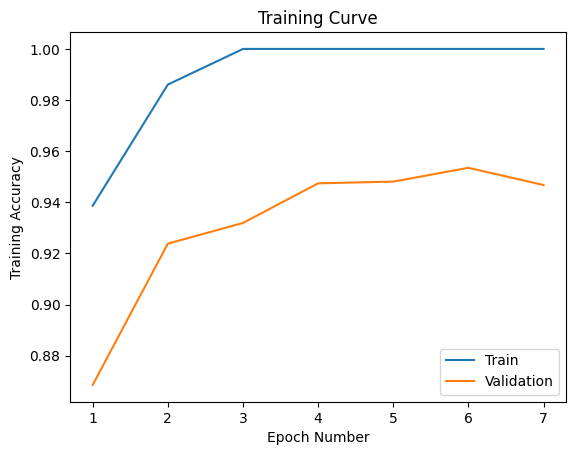

Final Training Accuracy: 1.0
Final Validation Accuracy: 0.9467654986522911
Best Validation Accuracy: 0.9535040431266847


In [ ]:
model_alexNet = AlexNetModelClassification()

train_with_transfer_learning(model_alexNet, train_dataset_folder, batch_size=32, num_epochs=7)

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

-------------------
**Test Accuracy of Transfer Learning vs Without Transfer Learning**


The test Accuracy of the best model was 94.3 % with transfer learning.
The test accuracy of the best model for gesture detection was about 50% (without transfer learning) (with overall a smaller dataset used, large dataset had very few epochs as hyperparameters).

The accuracy of the transfer learning was significantly better than the test accuracy of without transfer learning. This is because AlexNet's hyperparameters are already pre-trained with the best number of hidden layers,and number of neurons. It also has deeper layers than the CNN made from scratch.

In [ ]:
size_of_batch = 32
total_accuracy_test = train_test_val_Accuracy(model_alexNet, size_of_batch,"Test")
total_accuracy_test = total_accuracy_test*100
print("test accuracy (%): ",total_accuracy_test )

test accuracy (%):  94.31057563587683
